# Read Data From Excel File:
* See this. 
* Chat came from https://chatgpt.com/share/67af4944-d134-8003-9e57-5e3d0ae669b9

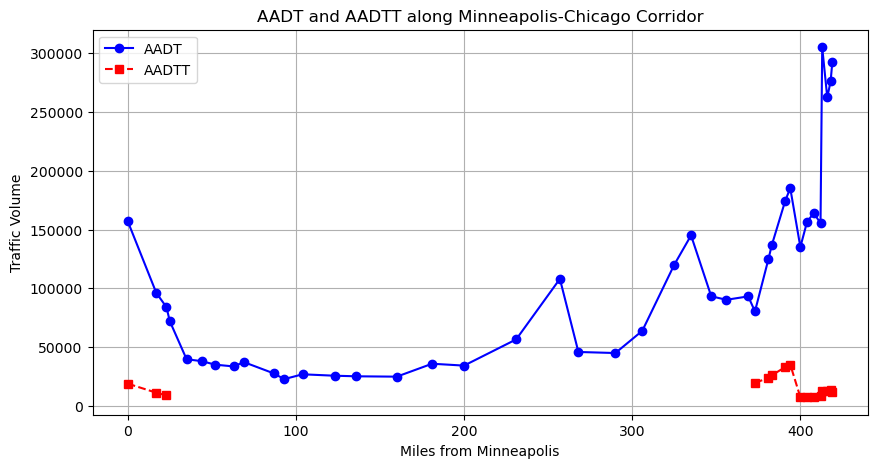

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the spreadsheet
file_path = "corridor_data-1.xlsx"
xls = pd.ExcelFile(file_path)

# Load the "Minn_Chi" sheet
df_minn_chi = pd.read_excel(xls, sheet_name="Minn_Chi")

# Extract relevant data, skipping metadata rows
#    The reason that we start at index 10 is because data starts at row 11
df_clean = df_minn_chi.iloc[10:].reset_index(drop=True)

# Rename columns for clarity
df_clean.columns = ["Miles_from_MPLS", "Mile_Marker", "AADT", "AADTT", "AADTT%", "Location_ID", "Highway", "State"]

# Convert numeric columns to proper data types
df_clean = df_clean.astype({"Miles_from_MPLS": float, "Mile_Marker": float, "AADT": float, "AADTT": str})

# Convert AADTT to numeric, handling missing values represented as "-"
df_clean["AADTT"] = pd.to_numeric(df_clean["AADTT"], errors='coerce')

# Plot AADT and AADTT
plt.figure(figsize=(10, 5))
plt.plot(df_clean["Miles_from_MPLS"], df_clean["AADT"], marker='o', linestyle='-', label="AADT", color='blue')

# Plot AADTT if it exists
if df_clean["AADTT"].notna().any():
    plt.plot(df_clean["Miles_from_MPLS"], df_clean["AADTT"], marker='s', linestyle='--', label="AADTT", color='red')

plt.xlabel("Miles from Minneapolis")
plt.ylabel("Traffic Volume")
plt.title("AADT and AADTT along Minneapolis-Chicago Corridor")
plt.legend()
plt.grid(True)
plt.show()
